In [1]:
# Logistic Regression
# Dataset: Bank

# import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
# pip install pandas_ml
from pandas_ml import ConfusionMatrix
import numpy as np
# from sklearn import cross_validation as cv
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score



In [2]:
# read the input file
# --------------------------------------
path="D:\\Imarticus\\Python\\bank.csv"
bank = pd.read_csv(path)
bank.head(5)

,age,job,marital,education,contact,month,day_of_week,duration,y
0,56,housemaid,married,basic.4y,telephone,may,mon,261,no
1,57,services,married,high.school,telephone,may,mon,149,no
2,37,services,married,high.school,telephone,may,mon,226,no
3,40,admin.,married,basic.6y,telephone,may,mon,151,no
4,56,services,married,high.school,telephone,may,mon,307,no


In [3]:
# pd.set_option("display.expand_frame_repr", False)

# print the columns
# --------------------------------------
col = list(bank.columns)
print(col)


['age', 'job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'duration', 'y']


In [4]:
# count of Rows and Columns 
# -----------------------------
bank.shape


(41188, 9)

In [5]:
# total number of rows
# --------------------------------------
len(bank.index)

41188

In [6]:
# print the records for view
# --------------------------------------
bank.head()

,age,job,marital,education,contact,month,day_of_week,duration,y
0,56,housemaid,married,basic.4y,telephone,may,mon,261,no
1,57,services,married,high.school,telephone,may,mon,149,no
2,37,services,married,high.school,telephone,may,mon,226,no
3,40,admin.,married,basic.6y,telephone,may,mon,151,no
4,56,services,married,high.school,telephone,may,mon,307,no


In [7]:
# print the records for view
# --------------------------------------
bank.head()

,age,job,marital,education,contact,month,day_of_week,duration,y
0,56,housemaid,married,basic.4y,telephone,may,mon,261,no
1,57,services,married,high.school,telephone,may,mon,149,no
2,37,services,married,high.school,telephone,may,mon,226,no
3,40,admin.,married,basic.6y,telephone,may,mon,151,no
4,56,services,married,high.school,telephone,may,mon,307,no


In [8]:
# describe the dataset (R,C)
# datatype = "object" indicates factor variables
# --------------------------------------
bank.dtypes


age             int64
job            object
marital        object
education      object
contact        object
month          object
day_of_week    object
duration        int64
y              object
dtype: object

In [9]:
# need the Y-variable to be Numeric (0 and 1) for Logistic Regression
# steps:
# 1) create a new Y-variable and initialise with 0/1 appropriately
# 2) delete the old Y value 
# -----------------------------------------------------------------
# 1)
# --
bank['purchase'] = 0
bank.purchase[bank.y == "yes"] = 1
bank.purchase[bank.y == "no"] = 0 

# 2)
# --
bank = bank.drop(['y'],axis=1)

C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [10]:
# check 1 and 2
# --------------
bank.columns
bank.head(50)
col = list(bank.columns)
print(col)


['age', 'job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'duration', 'purchase']


In [11]:
# Get all the factor X-variables
# --------------------------------------
bank.dtypes


age             int64
job            object
marital        object
education      object
contact        object
month          object
day_of_week    object
duration        int64
purchase        int64
dtype: object

In [12]:
factor_x = bank.select_dtypes(exclude=["int64","float64","category"]).columns.values
print(factor_x)


['job' 'marital' 'education' 'contact' 'month' 'day_of_week']


In [13]:
# Unique values of all Factor variables
# --------------------------------------
for c in factor_x:
    print("Factor variable = '" + c + "'")
    print(bank[c].unique())
    print("***")

Factor variable = 'job'
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
***
Factor variable = 'marital'
['married' 'single' 'divorced' 'unknown']
***
Factor variable = 'education'
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
***
Factor variable = 'contact'
['telephone' 'cellular']
***
Factor variable = 'month'
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
***
Factor variable = 'day_of_week'
['mon' 'tue' 'wed' 'thu' 'fri']
***


In [14]:
# reduce levels for factor variables
# --------------------------------------
# education
# ----------
bank.education[
        (bank.education == 'basic.4y') | 
        (bank.education == 'basic.6y') |
        (bank.education == 'basic.9y') |
        (bank.education == 'unknown')
        ] = 'school'
bank.education[(bank.education == 'professional.course')] = 'certification'
bank.education[(bank.education == 'university.degree')] = 'degree'
print(bank.education.unique())


['school' 'high.school' 'certification' 'degree' 'illiterate']


C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [16]:
# job
# ---
print(bank.job.unique())

bank.job[(bank.job == 'retired') |
         (bank.job == 'unknown') |
        (bank.job == 'student')
        ] = 'unemployed'

bank.job[(bank.job == 'housemaid') |
         (bank.job == 'technician') 
         ] = 'services'

print(bank.job.unique())



['services' 'admin.' 'blue-collar' 'unemployed' 'management'
 'self-employed' 'entrepreneur']
['services' 'admin.' 'blue-collar' 'unemployed' 'management'
 'self-employed' 'entrepreneur']


C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [17]:
# marital
# --------
bank.marital.unique()
bank.marital[bank.marital == 'unknown'] = 'single'
bank.marital.value_counts()

print(bank.purchase.unique())

[0 1]


C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [18]:
# check for NULLS, blanks and zeroes
# --------------------------------------
for c in col:
    if (len(bank[c][bank[c].isnull()])) > 0:
        print("WARNING: Column '{}' has NULL values".format(c))

    if (len(bank[c][bank[c] == 0])) > 0:
        print("WARNING: Column '{}' has value = 0".format(c))


In [19]:
# convert all X-categorical variables
# ---------------------------------
for c in factor_x:
    bank[c] = bank[c].astype('category',copy=False)
bank.dtypes

age               int64
job            category
marital        category
education      category
contact        category
month          category
day_of_week    category
duration          int64
purchase          int64
dtype: object

In [20]:
# Exploratory Data Analysis
# -------------------------
# get the count of "YES" (1) and "NO" (0)
# --------------------------------------
bank['purchase'].value_counts()
bank['purchase'].value_counts()/len(bank)


0    0.887346
1    0.112654
Name: purchase, dtype: float64

,age,duration
purchase,,
0,39.911185,220.844807
1,40.913147,553.191164


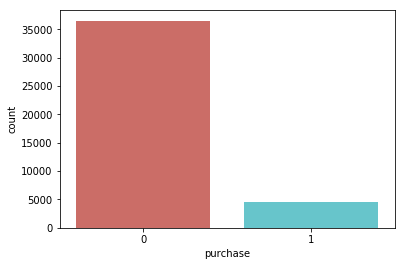

In [21]:
# plot the "Yes" and "No"
# --------------------------------------
sns.countplot(x='purchase', data=bank, palette='hls')

# get the average of numerical variables for 
# each group "YES" and "NO"
# --------------------------------------
bank.groupby('purchase').mean()
# interpretation: average age is higher of customers who purchased


Text(0, 0.5, 'Frequency of Purchase')

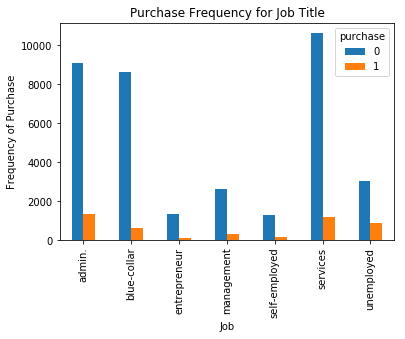

In [22]:
# plot data for visual representation
# --------------------------------------

# Job vs Purchase
# --------------------------------------
pd.crosstab(bank.job, bank.purchase).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')


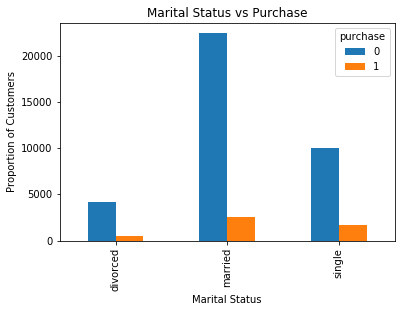

In [23]:
# Marital vs Purchase
# --------------------------------------
# chart
pd.crosstab(bank.marital,bank.purchase).plot(kind='bar')
plt.title('Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')


Text(0, 0.5, 'Proportion of Customers')

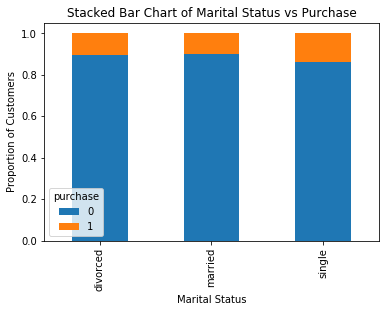

In [24]:
# proportion
# --------------------------------------
table=pd.crosstab(bank.marital, bank.purchase)
table.div(table.sum(1).astype(float), 
          axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')


Text(0, 0.5, 'Proportion of Customers')

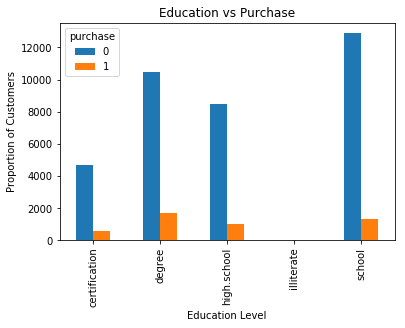

In [25]:
# Education vs Purchase
# chart
# --------------------------------------
pd.crosstab(bank.education,bank.purchase).plot(kind='bar')
plt.title('Education vs Purchase')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

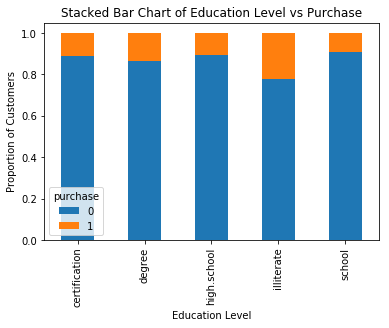

In [26]:
# proportion
table=pd.crosstab(bank.education, bank.purchase)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education Level vs Purchase')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Customers')


Text(0, 0.5, 'Customers')

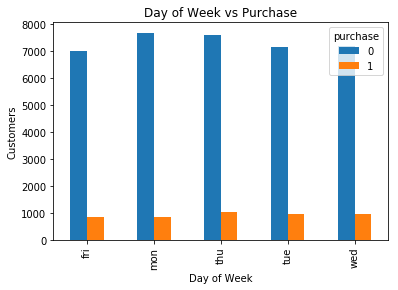

In [27]:
# Day of Week Vs Purchase
# --------------------------------------
pd.crosstab(bank.day_of_week,bank.purchase).plot(kind='bar')
plt.title('Day of Week vs Purchase')
plt.xlabel('Day of Week')
plt.ylabel('Customers')

In [28]:
# get the dummy coding for factor variables
# -----------------------------------------
bank.marital.unique()
pd.get_dummies(bank.marital,drop_first=False).head(20)
pd.get_dummies(bank.marital,drop_first=True).tail(20)


# create the dummy variables
# for every column having more than 1 value, 
# create dummy variables
# this is done since there are characters in the factor variables
# ---------------------------------------------------------------

print(factor_x)

['job' 'marital' 'education' 'contact' 'month' 'day_of_week']


In [29]:
new_bank = bank.copy()

# del cat_list

for var in factor_x:
    cat_list = pd.get_dummies(bank[var], drop_first=True, prefix=var)
    # data1=bank.join(cat_list)
    new_bank = new_bank.join(cat_list)

new_bank

,age,job,marital,education,contact,month,day_of_week,duration,purchase,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,services,married,school,telephone,may,mon,261,0,0,...,0,0,1,0,0,0,1,0,0,0
1,57,services,married,high.school,telephone,may,mon,149,0,0,...,0,0,1,0,0,0,1,0,0,0
2,37,services,married,high.school,telephone,may,mon,226,0,0,...,0,0,1,0,0,0,1,0,0,0
3,40,admin.,married,school,telephone,may,mon,151,0,0,...,0,0,1,0,0,0,1,0,0,0
4,56,services,married,high.school,telephone,may,mon,307,0,0,...,0,0,1,0,0,0,1,0,0,0
5,45,services,married,school,telephone,may,mon,198,0,0,...,0,0,1,0,0,0,1,0,0,0
6,59,admin.,married,certification,telephone,may,mon,139,0,0,...,0,0,1,0,0,0,1,0,0,0
7,41,blue-collar,married,school,telephone,may,mon,217,0,1,...,0,0,1,0,0,0,1,0,0,0
8,24,services,single,certification,telephone,may,mon,380,0,0,...,0,0,1,0,0,0,1,0,0,0
9,25,services,single,high.school,telephone,may,mon,50,0,0,...,0,0,1,0,0,0,1,0,0,0


In [30]:
# old+dummy columns
new_col_set = new_bank.columns
print(new_col_set)
len(new_col_set)

Index(['age', 'job', 'marital', 'education', 'contact', 'month', 'day_of_week',
       'duration', 'purchase', 'job_blue-collar', 'job_entrepreneur',
       'job_management', 'job_self-employed', 'job_services', 'job_unemployed',
       'marital_married', 'marital_single', 'education_degree',
       'education_high.school', 'education_illiterate', 'education_school',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')


35

In [31]:
# data with new columns
new_bank.head()


,age,job,marital,education,contact,month,day_of_week,duration,purchase,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,services,married,school,telephone,may,mon,261,0,0,...,0,0,1,0,0,0,1,0,0,0
1,57,services,married,high.school,telephone,may,mon,149,0,0,...,0,0,1,0,0,0,1,0,0,0
2,37,services,married,high.school,telephone,may,mon,226,0,0,...,0,0,1,0,0,0,1,0,0,0
3,40,admin.,married,school,telephone,may,mon,151,0,0,...,0,0,1,0,0,0,1,0,0,0
4,56,services,married,high.school,telephone,may,mon,307,0,0,...,0,0,1,0,0,0,1,0,0,0


In [32]:
# get the difference of new and old columns
to_keep = list(set(new_col_set).difference(set(factor_x)))
to_keep
to_keep.sort()
to_keep
len(to_keep)

29

In [33]:
# create the final dataset with the final columns set
# ---------------------------------------------------
bank_final = new_bank[to_keep]
bank_final.head(4)
bank_final.columns.sort_values()
len(bank_final.columns)


29

In [34]:
# reordering the columns
# ---------------------------------------------------
bank_final = pd.concat(
        [bank_final['purchase'], 
        bank_final.drop('purchase',axis=1)],
        axis=1)

bank_final.columns

Index(['purchase', 'age', 'contact_telephone', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'duration',
       'education_degree', 'education_high.school', 'education_illiterate',
       'education_school', 'job_blue-collar', 'job_entrepreneur',
       'job_management', 'job_self-employed', 'job_services', 'job_unemployed',
       'marital_married', 'marital_single', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

In [35]:
import random as r
r.seed(100)

# split the dataset into train and test
# ---------------------------------------------------
train, test = train_test_split(bank_final, test_size = 0.3)

print(train.shape)
print(test.shape)

(28831, 29)
(12357, 29)


In [37]:

total_cols=len(bank_final.columns)
print(total_cols)


29


In [38]:
# split the train and test into X and Y variables
train_x = train.iloc[:,1:total_cols+1]
train_y = train.iloc[:,0]

train_x.iloc[0:5]

test_x  = test.iloc[:,1:total_cols+1]
test_y = test.iloc[:,0]




In [39]:
# build the base model with all columns
# -------------------------------------

# build the logistic regression model
# build the logistic regression model
logit_model = sm.Logit(train_y, train_x)
logit_result = logit_model.fit()
logit_result.summary2()


Optimization terminated successfully.
         Current function value: 0.250839
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  0.282     
Dependent Variable:    purchase          AIC:               14519.8850
Date:                  2019-03-07 23:31  BIC:               14751.4228
No. Observations:      28831             Log-Likelihood:    -7231.9   
Df Model:              27                LL-Null:           -10067.   
Df Residuals:          28803             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        8.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
age                   -0.0203   0.0017 -11.6907 0.0000 -0.0236 -0.0169
contact_telephone     -1.4735   0.0683 -21.5594 0.0000 -1.6075 -1.3396
day_of_week_mon       -0.3640   0.0687  -5.2946 0.0000 -0.4987 -0.2292
day_of_week_thu       -0.2594   0.0661  -3.9240 0.0001 -0.3889 -0.1298
day_of_week_tue       -0.1387   0.0684  -2.0271 0.0427 -0.2728 -0.0046
day_of_week_wed       -0.0799   0.0677  -1.1801 0.2380 -0.2127  0.0528
duration               0.0041   0.0001  51.6637 0.0000  0.0039  0.0042
education_degree      -0.4533   0.0694  -6.5290 0.0000 -0.5893 -0.3172
education_high.school -0.7170   0.0713 -10.0594 0.0000 -0.8567 -0.5773
education_illiterate   0.7171   0.8792   0.8156 0.4147 -1.0061  2.4403
education_school      -0.4860   0.0762  -6.3749 0.0000 -0.6354 -0.3365
job_blue-collar       -0.8223   0.0839  -9.8012 0.0000 -0.9867 -0.6579
job_entrepreneur      -0.6951   0.1394  -4.9875 0.0000 -0.9682 -0.4219
job_management        -0.2808   0.0924  -3.0393 0.0024 -0.4618 -0.0997
job_self-employed     -0.5698   0.1302  -4.3756 0.0000 -0.8250 -0.3146
job_services          -0.5940   0.0616  -9.6392 0.0000 -0.7148 -0.4732
job_unemployed         0.5686   0.0744   7.6428 0.0000  0.4228  0.7144
marital_married       -0.5469   0.0621  -8.8046 0.0000 -0.6686 -0.4251
marital_single        -0.5149   0.0654  -7.8770 0.0000 -0.6430 -0.3868
month_aug             -1.2350   0.0808 -15.2906 0.0000 -1.3933 -1.0767
month_dec              1.0445   0.2202   4.7440 0.0000  0.6130  1.4760
month_jul             -1.5569   0.0810 -19.2267 0.0000 -1.7156 -1.3982
month_jun             -0.1919   0.0937  -2.0487 0.0405 -0.3755 -0.0083
month_mar              1.2435   0.1277   9.7340 0.0000  0.9931  1.4939
month_may             -1.2719   0.0764 -16.6558 0.0000 -1.4216 -1.1223
month_nov             -1.2936   0.0901 -14.3534 0.0000 -1.4702 -1.1170
month_oct              0.9017   0.1214   7.4278 0.0000  0.6638  1.1397
month_sep              0.8782   0.1303   6.7407 0.0000  0.6228  1.1335
======================================================================

"""

In [40]:
# cross-validation
# ----------------
# number of folds
kf = KFold(n_splits=5) 
kf.get_n_splits(train_x)
print(kf)


KFold(n_splits=5, random_state=None, shuffle=False)


In [42]:
f# predict on the test set
# ---------------------------------------------------
pred_y = logit_result.predict(test_x)
y_results = list(pred_y)
pred_y
length = len(y_results)

# set the default cut-off to 0.5
# and set predictions to 0 and 1
for i in range(0,length):
    if y_results[i] <= 0.5:
        y_results[i] = 0
    else:
        y_results[i] = 1
        
# accuracy score
print(accuracy_score(test_y,y_results)*100)
old = 1
# split the training further into train and test
for train_index, test_index in kf.split(train_x):
    
    cv_train_x = train_x.iloc[train_index,]
    cv_train_y = train_y.iloc[train_index,]
    
    cv_test_x = train_x.iloc[test_index,]
    cv_test_y = train_y.iloc[test_index,]
    
    # build the model on the CV training data and predict on CV testing data
    cv_logit_model = sm.Logit(cv_train_y, cv_train_x).fit()
    cv_pdct = list(cv_logit_model.predict(cv_test_x))

    # set the default cut-off to 0.5
    # and set predictions to 0 and 1
    cv_length = len(cv_pdct)
    cv_results=list(cv_pdct).copy()
        
    for i in range(0,cv_length):
        if cv_pdct[i] <= 0.5:
            cv_results[i] = 0
        else:
            cv_results[i] = 1
    
    # accuracy score
    acc_score = accuracy_score(cv_test_y,cv_results)*100
    print('Fold={0},Accuracy={1}'.format(fold,acc_score) )
    
    fold+=1



Optimization terminated successfully.
         Current function value: 0.247569
         Iterations 8
Fold=1,Accuracy=89.82139760707474
Optimization terminated successfully.
         Current function value: 0.252363
         Iterations 8
Fold=2,Accuracy=90.18383628165105
Optimization terminated successfully.
         Current function value: 0.252885
         Iterations 8
Fold=3,Accuracy=89.95837669094693
Optimization terminated successfully.
         Current function value: 0.250130
         Iterations 8
Fold=4,Accuracy=89.94103364550816
Optimization terminated successfully.
         Current function value: 0.250379
         Iterations 8
Fold=5,Accuracy=89.54214360041624


In [43]:
# predict on the test set
# ---------------------------------------------------
pred_y = logit_result.predict(test_x)
y_results = list(pred_y)
pred_y
length = len(y_results)

# set the default cut-off to 0.5
# and set predictions to 0 and 1
for i in range(0,length):
    if y_results[i] <= 0.5:
        y_results[i] = 0
    else:
        y_results[i] = 1
        
# accuracy score
print(accuracy_score(test_y,y_results)*100)


89.29351784413693


In [44]:
# confusion matrix
cm=ConfusionMatrix(list(y_results),list(test_y))
print(cm)
cm.print_stats()

Predicted  False  True  __all__
Actual                         
False      10628  1026    11654
True         297   406      703
__all__    10925  1432    12357
population: 12357
P: 703
N: 11654
PositiveTest: 1432
NegativeTest: 10925
TP: 406
TN: 10628
FP: 1026
FN: 297
TPR: 0.577524893314367
TNR: 0.9119615582632572
PPV: 0.2835195530726257
NPV: 0.9728146453089245
FPR: 0.08803844173674275
FDR: 0.7164804469273743
FNR: 0.422475106685633
ACC: 0.8929351784413693
F1_score: 0.380327868852459
MCC: 0.3542204358641378
informedness: 0.48948645157762405
markedness: 0.25633419838155014
prevalence: 0.05689083110787408
LRP: 6.559917257978199
LRN: 0.4632597754341708
DOR: 14.160342869894524
FOR: 0.027185354691075515


In [45]:
# Classification report : precision, recall, F-score
print(cr(test_y, y_results))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10925
           1       0.58      0.28      0.38      1432

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.74      0.63      0.66     12357
weighted avg       0.87      0.89      0.88     12357



In [46]:
# draw the ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(test_y, y_results)
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

0.6281670991907752


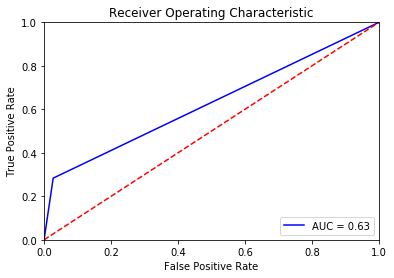

In [47]:

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()